# Projeto 2 - Ciência dos dados

### Integrantes :

* Camila Magni 
* Gustavo Borba
* Julia Figueiredo
* Lincoln Rodrigo

## Introdução

In [2]:
# Importando as bibliotecas que serão utilizadas no projeto
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
import numpy as np
import statsmodels.api as sm
from IPython.display import display
import seaborn as sns

### Limpeza inicial da base de dados :


In [3]:
import pandas as pd

dados = pd.read_csv('music_genre.csv')

dados = dados.drop(['instance_id','key','acousticness','mode','instrumentalness','obtained_date'],axis=1)
dados.head()


,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,music_genre
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,-1.0,0.941,0.115,-5.201,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,The Shining Path,31.0,0.622,218293.0,0.890,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,Hurricane,28.0,0.620,215613.0,0.755,0.534,-4.617,0.0345,127.994,0.333,Electronic
3,Dubloadz,Nitro,34.0,0.774,166875.0,0.700,0.157,-4.498,0.2390,128.014,0.270,Electronic
4,What So Not,Divide & Conquer,32.0,0.638,222369.0,0.587,0.157,-6.266,0.0413,145.036,0.323,Electronic


### Dados gerais do Data Frame e Análise Exploratória:

In [4]:
dados.dtypes  #Todas colunas já estão classificadas da maneira correta

artist_name      object
track_name       object
popularity      float64
danceability    float64
duration_ms     float64
energy          float64
liveness        float64
loudness        float64
speechiness     float64
tempo            object
valence         float64
music_genre      object
dtype: object

In [5]:
dados.describe()

,popularity,danceability,duration_ms,energy,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.558241,2.212526e+05,0.599755,0.193896,-9.133761,0.093586,0.456264
std,15.542008,0.178632,1.286720e+05,0.264559,0.161637,6.162990,0.101373,0.247119
min,0.000000,0.059600,-1.000000e+00,0.000792,0.009670,-47.046000,0.022300,0.000000
25%,34.000000,0.442000,1.748000e+05,0.433000,0.096900,-10.860000,0.036100,0.257000
50%,45.000000,0.568000,2.192810e+05,0.643000,0.126000,-7.276500,0.048900,0.448000
75%,56.000000,0.687000,2.686122e+05,0.815000,0.244000,-5.173000,0.098525,0.648000
max,99.000000,0.986000,4.830606e+06,0.999000,1.000000,3.744000,0.942000,0.992000


In [6]:
#Modificando milisegundos para segundos:

dados['duration_s']= dados.duration_ms/1000

dados

,artist_name,track_name,popularity,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,music_genre,duration_s
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,-1.0,0.941,0.115,-5.201,0.0748,100.889,0.759,Electronic,-0.001
1,Thievery Corporation,The Shining Path,31.0,0.622,218293.0,0.890,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,218.293
2,Dillon Francis,Hurricane,28.0,0.620,215613.0,0.755,0.534,-4.617,0.0345,127.994,0.333,Electronic,215.613
3,Dubloadz,Nitro,34.0,0.774,166875.0,0.700,0.157,-4.498,0.2390,128.014,0.270,Electronic,166.875
4,What So Not,Divide & Conquer,32.0,0.638,222369.0,0.587,0.157,-6.266,0.0413,145.036,0.323,Electronic,222.369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.913,-1.0,0.574,0.119,-7.022,0.2980,98.02799999999999,0.330,Hip-Hop,-0.001
50001,Roy Woods,Drama (feat. Drake),72.0,0.709,251860.0,0.362,0.109,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop,251.860
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.693,189483.0,0.763,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop,189.483
50003,The-Dream,Shawty Is Da Shit,65.0,0.782,262773.0,0.472,0.106,-5.016,0.0441,75.88600000000001,0.354,Hip-Hop,262.773


In [7]:
# Removendo a coluna de milisegundos, uma vez que vamos trabalhar com essa variável duração em segundos
dados = dados.drop(['duration_ms'],axis=1)
dados

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,speechiness,tempo,valence,music_genre,duration_s
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,0.941,0.115,-5.201,0.0748,100.889,0.759,Electronic,-0.001
1,Thievery Corporation,The Shining Path,31.0,0.622,0.890,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,218.293
2,Dillon Francis,Hurricane,28.0,0.620,0.755,0.534,-4.617,0.0345,127.994,0.333,Electronic,215.613
3,Dubloadz,Nitro,34.0,0.774,0.700,0.157,-4.498,0.2390,128.014,0.270,Electronic,166.875
4,What So Not,Divide & Conquer,32.0,0.638,0.587,0.157,-6.266,0.0413,145.036,0.323,Electronic,222.369
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.913,0.574,0.119,-7.022,0.2980,98.02799999999999,0.330,Hip-Hop,-0.001
50001,Roy Woods,Drama (feat. Drake),72.0,0.709,0.362,0.109,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop,251.860
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.693,0.763,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop,189.483
50003,The-Dream,Shawty Is Da Shit,65.0,0.782,0.472,0.106,-5.016,0.0441,75.88600000000001,0.354,Hip-Hop,262.773


In [8]:
dados.popularity.describe()

count    50000.000000
mean        44.220420
std         15.542008
min          0.000000
25%         34.000000
50%         45.000000
75%         56.000000
max         99.000000
Name: popularity, dtype: float64

In [9]:
dados.danceability.describe()

count    50000.000000
mean         0.558241
std          0.178632
min          0.059600
25%          0.442000
50%          0.568000
75%          0.687000
max          0.986000
Name: danceability, dtype: float64

In [10]:
filtro=dados.popularity>34
filtro2= dados.danceability>0.442
loc=dados.loc[filtro & filtro2 ,:]
loc

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,speechiness,tempo,valence,music_genre,duration_s
5,Axel Boman,Hello,47.0,0.755,0.731,0.2160,-10.517,0.0412,?,0.614,Electronic,519.468
6,Jordan Comolli,Clash,46.0,0.572,0.803,0.1060,-4.294,0.3510,149.995,0.230,Electronic,214.408
7,Hraach,Delirio,43.0,0.809,0.706,0.0635,-9.339,0.0484,120.008,0.761,Electronic,416.132
8,Kayzo,NEVER ALONE,39.0,0.509,0.921,0.1780,-3.175,0.2680,149.94799999999998,0.273,Electronic,292.800
19,empty_field,7th Sevens,50.0,0.656,0.653,0.1120,-11.883,0.0396,117.999,0.199,Electronic,307.328
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.913,0.574,0.1190,-7.022,0.2980,98.02799999999999,0.330,Hip-Hop,-0.001
50001,Roy Woods,Drama (feat. Drake),72.0,0.709,0.362,0.1090,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop,251.860
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.693,0.763,0.1430,-5.443,0.1460,131.079,0.395,Hip-Hop,189.483
50003,The-Dream,Shawty Is Da Shit,65.0,0.782,0.472,0.1060,-5.016,0.0441,75.88600000000001,0.354,Hip-Hop,262.773


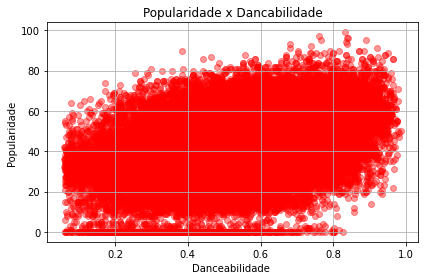

In [11]:
plt.scatter(dados.danceability, dados.popularity, c='red', alpha=0.4) # alpha representa a transparência de cada ponto plotado no gráfico
plt.title('Popularidade x Dancabilidade')
plt.xlabel('Danceabilidade ')
plt.ylabel('Popularidade')
plt.grid(True) # Coloca uma grade no gráfico para melhor visualizar pontos específicos
plt.tight_layout()
plt.show() 


In [12]:
dados['popularity'].corr(dados['danceability'])

0.356419846058725

In [13]:
dados.head(1)

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,speechiness,tempo,valence,music_genre,duration_s
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,0.941,0.115,-5.201,0.0748,100.889,0.759,Electronic,-0.001


In [14]:
dados['popularity'].corr(dados['energy'])

0.2163453352500851

In [15]:
dados['popularity'].corr(dados['liveness'])

-0.0394683074322984

In [16]:
dados['popularity'].corr(dados['loudness'])

0.3179409225481483

In [17]:
dados['popularity'].corr(dados['speechiness'])

0.22430947001638107

In [18]:
dados['popularity'].corr(dados['duration_s'])

-0.08380905501762259

In [19]:
dados['popularity'].corr(dados['valence'])

0.1249130092580369

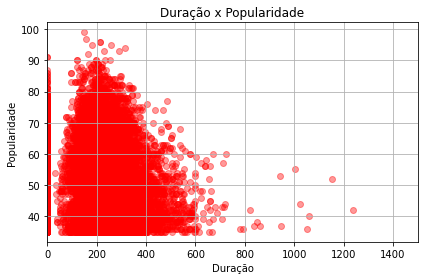

In [20]:
plt.scatter( loc.duration_s,loc.popularity, c='red', alpha=0.4) # alpha representa a transparência de cada ponto plotado no gráfico
plt.title('Duração x Popularidade')
plt.xlabel('Duração')
plt.ylabel('Popularidade')
plt.xlim([0,1500])
plt.grid(True) # Coloca uma grade no gráfico para melhor visualizar pontos específicos
plt.tight_layout()
plt.show() 

##### Percebemos que quando menor a duração da musica maior a popularidade 

#### Gerando tabela de popularidade por gêneros:

In [21]:
pd.crosstab(dados['popularity'], dados['music_genre'],normalize=True,margins=True)*100

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock,All
popularity,,,,,,,,,,,
0.0,0.010,0.042,0.062,1.082,0.082,0.054,0.000,0.054,0.000,0.002,1.388
1.0,0.002,0.006,0.006,0.016,0.000,0.000,0.000,0.030,0.000,0.002,0.062
2.0,0.000,0.006,0.004,0.062,0.000,0.000,0.000,0.030,0.000,0.000,0.102
3.0,0.000,0.002,0.006,0.056,0.000,0.002,0.000,0.016,0.000,0.004,0.086
4.0,0.000,0.008,0.006,0.062,0.000,0.000,0.000,0.008,0.000,0.000,0.084
...,...,...,...,...,...,...,...,...,...,...,...
95.0,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.004
96.0,0.000,0.000,0.000,0.000,0.000,0.002,0.002,0.000,0.000,0.000,0.004
97.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.002


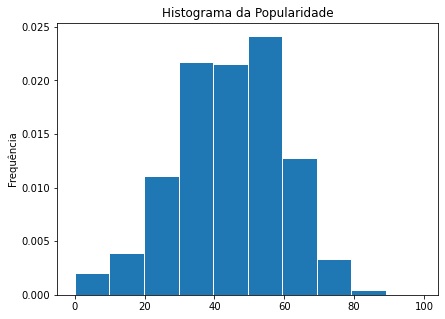

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(121)

plt.hist(dados.popularity, edgecolor='white',density=True)
plt.title('Histograma da Popularidade')
plt.ylabel('Frequência')


plt.show()



### Regressão Múltipla 

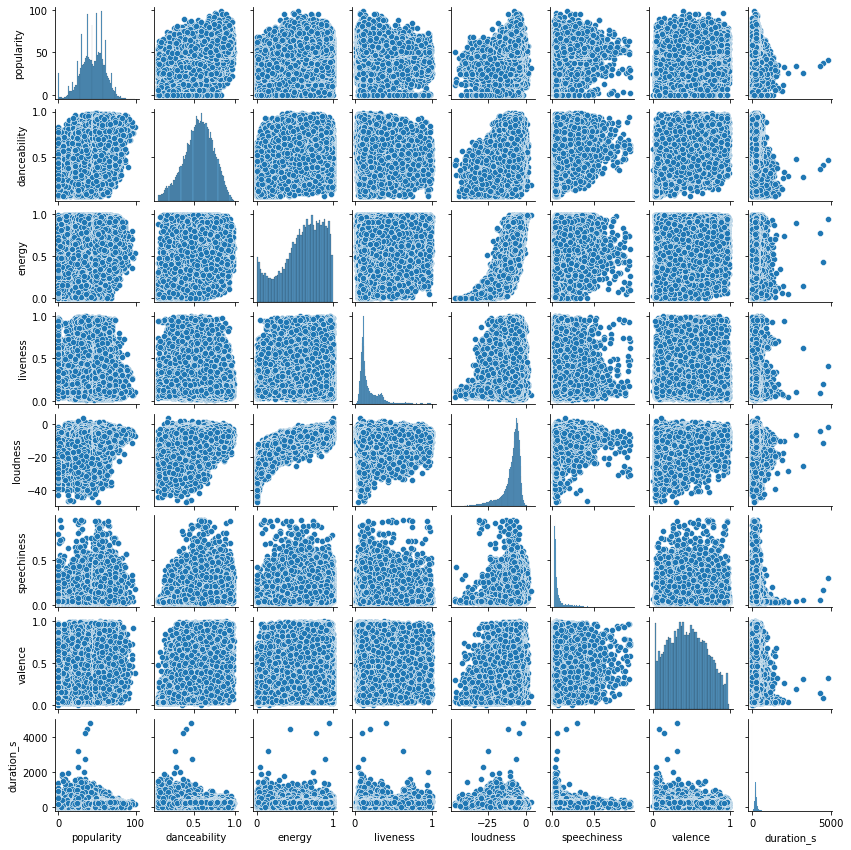

In [23]:
sns.pairplot(dados, height=1.5);

In [24]:
teste = dados.dropna()
teste

,artist_name,track_name,popularity,danceability,energy,liveness,loudness,speechiness,tempo,valence,music_genre,duration_s
0,Röyksopp,Röyksopp's Night Out,27.0,0.652,0.941,0.115,-5.201,0.0748,100.889,0.759,Electronic,-0.001
1,Thievery Corporation,The Shining Path,31.0,0.622,0.890,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,218.293
2,Dillon Francis,Hurricane,28.0,0.620,0.755,0.534,-4.617,0.0345,127.994,0.333,Electronic,215.613
3,Dubloadz,Nitro,34.0,0.774,0.700,0.157,-4.498,0.2390,128.014,0.270,Electronic,166.875
4,What So Not,Divide & Conquer,32.0,0.638,0.587,0.157,-6.266,0.0413,145.036,0.323,Electronic,222.369
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,BEXEY,GO GETTA,59.0,0.913,0.574,0.119,-7.022,0.2980,98.02799999999999,0.330,Hip-Hop,-0.001
50001,Roy Woods,Drama (feat. Drake),72.0,0.709,0.362,0.109,-9.814,0.0550,122.04299999999999,0.113,Hip-Hop,251.860
50002,Berner,Lovin' Me (feat. Smiggz),51.0,0.693,0.763,0.143,-5.443,0.1460,131.079,0.395,Hip-Hop,189.483
50003,The-Dream,Shawty Is Da Shit,65.0,0.782,0.472,0.106,-5.016,0.0441,75.88600000000001,0.354,Hip-Hop,262.773


In [25]:
%matplotlib notebook

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [26]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [27]:
X = teste[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = teste['popularity']

In [28]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2058.
Date:                Thu, 25 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:05:00   Log-Likelihood:            -2.0344e+05
No. Observations:               50000   AIC:                         4.069e+05
Df Residuals:                   49994   BIC:                         4.070e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.5317      0.541     80.450      0.000      42.471      44.592
danceability    22.4985      0.393     57.293      0.000      21.729      23.268
energy          -5.8704      0.447    -13.137      0.000      -6.746      -4.995
liveness        -4.3914      0.401    -10.949      0.000      -5.177      -3.605
loudness         0.7681      0.020     38.536      0.000       0.729       0.807
duration_s      -0.0022      0.000     -4.379      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      570.193   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.447
Skew:                          -0.265   Prob(JB):                    1.01e-128
Kurtosis:                       2.959   Cond. No.                     2.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modelos de Predição

### Regressão Linear

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # importa o model
from sklearn.datasets import load_boston
dados = dados.dropna()
model = LinearRegression()

X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
y = dados['popularity'].values.reshape(-1,1)

In [30]:
reg = LinearRegression()
reg.fit(X, y)

reg.coef_
print("O modelo é: popularidade = {:.5} + {:.5}*danceability + {:.5}*energy + {:.5}*liveness + {:.5}*loudness + {:.5}*duration".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2], reg.coef_[0][3], reg.coef_[0][4]))

O modelo é: popularidade = 43.532 + 22.499*danceability + -5.8704*energy + -4.3914*liveness + 0.76808*loudness + -0.002184*duration


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [32]:
regr = LinearRegression() # cria o modelo 
X_sm_train = sm.add_constant(X_train)
y_sm_train = sm.add_constant(y_train)
X_sm_test = sm.add_constant(X_test)
y_sm_test = sm.add_constant(y_test)
regr.fit(X_sm_train, y_sm_train) # treina o modelo

LinearRegression()

In [33]:
regr.score(X_sm_train,y_sm_train)

0.5853764838317383

### Random forest regression

In [34]:
dados = dados.dropna()

X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = dados['popularity']


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [37]:
Y_pred=regressor.predict(X_test)
Y_pred

array([36.6 , 45.1 , 55.3 , ..., 48.1 , 45.2 , 38.85])

In [38]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.22716219744851107

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

188.683519071199

### Regression tree

In [40]:
dados = dados.dropna()

X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = dados['popularity']


In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [42]:
from sklearn.tree import DecisionTreeRegressor 
regressor= DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [43]:
Y_pred=regressor.predict(X_test)
Y_pred

array([60., 41., 40., ..., 13., 50., 47.])

In [44]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

-0.3946371908975248

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

342.36654722222227

### Support Vector Regression

In [46]:
dados = dados.dropna()

X = dados[['danceability', 'energy', 'liveness', 'loudness', 'duration_s']]
Y = dados['popularity'].values.reshape(-1,1)


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [48]:
from sklearn.preprocessing import StandardScaler 

sc_X= StandardScaler()
sc_Y= StandardScaler()
X_train=sc_X.fit_transform(X_train)
Y_train=sc_Y.fit_transform(Y_train)

In [49]:
from sklearn.svm import SVR

regressor= SVR(kernel='rbf')
regressor.fit(X_train,Y_train)

C:\Users\camil\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [50]:
Y_pred=sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
Y_pred

array([52.1404283 , 48.02710146, 30.0308761 , ..., 41.76726317,
       51.58646639, 39.14191227])

In [51]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.2412466404002035

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

186.26476449567954